# IMPORTING THE LIB

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as mlt
import numpy as np

# Loading the data set

In [2]:
IMG_SIZE=224
BATCH_SIZE=128
CHANNELS=3

In [3]:
data1=tf.keras.preprocessing.image_dataset_from_directory(
    "cancer_img",
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 10000 files belonging to 2 classes.


# Data visualization

In [4]:
class_names = data1.class_names
class_names

['colon_aca', 'colon_n']

In [5]:
len(class_names)

2

In [6]:
 for image_batch, label_batch in data1.take(1):
        print(image_batch.shape)
        print(image_batch[0].numpy())

(128, 224, 224, 3)
[[[1.64954086e+02 1.05311226e+02 2.14836731e+02]
  [1.77586731e+02 1.18510201e+02 2.12663269e+02]
  [1.64954086e+02 1.06270409e+02 2.21770416e+02]
  ...
  [2.17785675e+02 2.00785675e+02 2.45484680e+02]
  [2.12285675e+02 1.94285675e+02 2.44571457e+02]
  [2.10857147e+02 1.92071442e+02 2.46428574e+02]]

 [[1.64147964e+02 9.83622437e+01 2.21928558e+02]
  [1.55071426e+02 9.48418427e+01 1.94015305e+02]
  [1.42663269e+02 8.85459213e+01 1.88188782e+02]
  ...
  [2.28025482e+02 2.12025482e+02 2.49045914e+02]
  [2.15413208e+02 1.99056061e+02 2.39382614e+02]
  [2.15719391e+02 1.98719391e+02 2.41790817e+02]]

 [[1.29515305e+02 6.10714340e+01 1.97801025e+02]
  [1.25846939e+02 6.04183655e+01 1.80775513e+02]
  [1.41367355e+02 8.55714264e+01 1.86908157e+02]
  ...
  [2.31790863e+02 2.16790863e+02 2.45790863e+02]
  [2.20596802e+02 2.05596802e+02 2.37260132e+02]
  [2.15785706e+02 2.00056122e+02 2.35244873e+02]]

 ...

 [[2.03571381e+02 1.05142754e+02 2.18571487e+02]
  [1.95469238e+02 8.

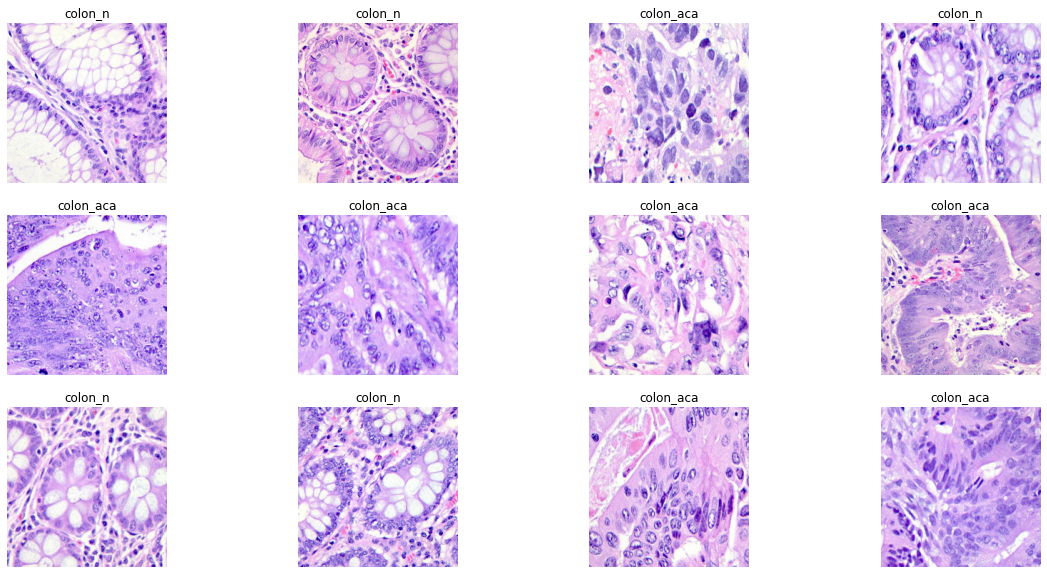

In [7]:
mlt.figure(figsize=(20,10))
for image_batch, label_batch in data1.take(1):
    for i in range(12):
        ax = mlt.subplot(3,4,i+1)
        mlt.imshow(image_batch[i].numpy().astype('uint8'))
        mlt.title(class_names[label_batch[i]])
        mlt.axis("off")


# Spliting the data

In [8]:
len(data1)

79

In [9]:
def get_dataset_div_tf(ds,train_split=0.74,val_split=0.13,test_split=0.13,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=5)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
    

In [10]:
train_ds,val_ds,test_ds=get_dataset_div_tf(data1)

In [11]:
len(train_ds)

58

In [12]:
len(val_ds)

10

In [13]:
len(test_ds)

11

## using gpu and cpu together

In [14]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Data preprocessing

In [15]:
resize_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),# to convert the supplied image acc. to the model 
    layers.experimental.preprocessing.Rescaling(1.0/255) # to cover the rgb
    
]) 

In [16]:
#for slight variation like rotation,zoom etc
data_augment=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

# Buliding the model

In [17]:
input_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)
n_classes = len(class_names)


model = models.Sequential([
    resize_rescale,
    data_augment,
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (128, 224, 224, 3)        0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [19]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=25,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/25
58/58 [==============================] - 498s 8s/step - loss: 0.6899 - accuracy: 0.5432 - val_loss: 0.7094 - val_accuracy: 0.5086
Epoch 2/25
42/58 [====================>.........] - ETA: 1:34 - loss: 0.6067 - accuracy: 0.6913

In [21]:
scores=model.evaluate(test_ds)

11/11 [==============================] - 47s 1s/step - loss: 0.0285 - accuracy: 0.9922


# Plotting the Accuracy and Loss Curves

In [22]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 58}

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

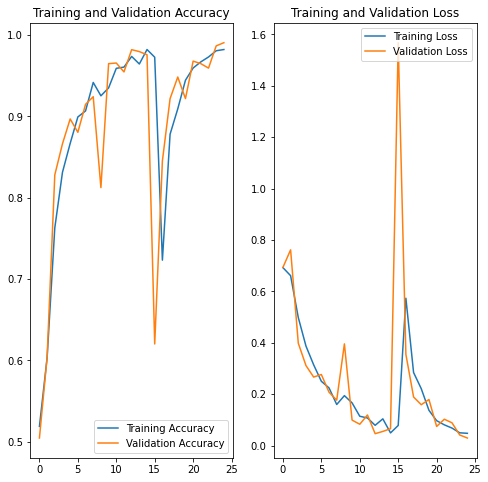

In [25]:
mlt.figure(figsize=(8, 8))
mlt.subplot(1, 2, 1)
mlt.plot(range(25), acc, label='Training Accuracy')
mlt.plot(range(25), val_acc, label='Validation Accuracy')
mlt.legend(loc='lower right')
mlt.title('Training and Validation Accuracy')

mlt.subplot(1, 2, 2)
mlt.plot(range(25), loss, label='Training Loss')
mlt.plot(range(25), val_loss, label='Validation Loss')
mlt.legend(loc='upper right')
mlt.title('Training and Validation Loss')
mlt.show()

# function

In [26]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 74ms/step


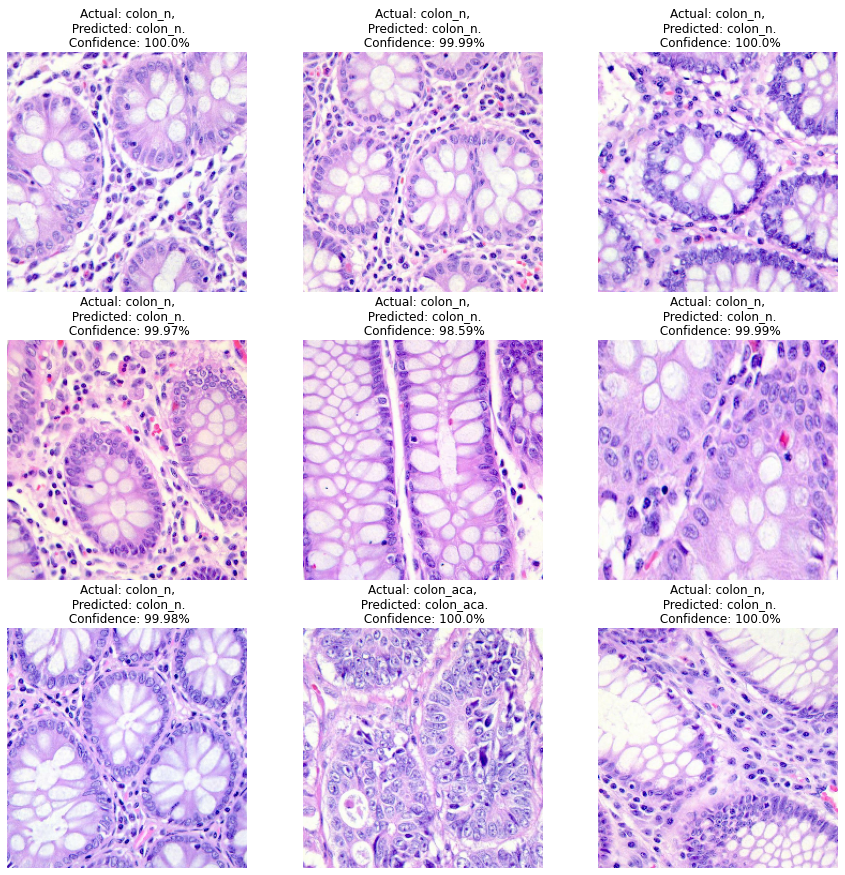

In [27]:
mlt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = mlt.subplot(3, 3, i + 1)
        mlt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        mlt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        mlt.axis("off")

In [29]:
print(class_names)

['colon_aca', 'colon_n']


In [30]:
data1.class_names

['colon_aca', 'colon_n']

# Saving the model

In [31]:
model_No='masked'
model.save(f"../models/{model_No}")

INFO:tensorflow:Assets written to: ../models/masked\assets


INFO:tensorflow:Assets written to: ../models/masked\assets


In [ ]:
pip install uvicorn